In [1]:
import pandas as pd

In [2]:
order = ["AS22WG001","AS22WG002","AS22WG003","AS22WG004","AS22WG005","AS22WG006","AS22WG007","AS22WG008","AS22WG009","AS22WG010","AS22WG011","AS22WG012","AS22WG013","AS22WG014","AS22WG015","AS22WG016","AS22WG017","AS22WG018","AS22WG019","AS22WG020","AS22WG021","AS22WG022","AS22WG023","AS22WG024"]

# Variant number confirmation

We used 2 methods in order to get the number of variants each vcf file have: <br>
1. Hail - a python package which works with SPARK and vcf file. the problem was it was too slow
2. bcftools - CL program. very common among bioinformaticains
<br><br>


Allegedly, the amount of variants suppose to be similar in both methods. Our result suggests otherwise

,bcftools_var,hail_var,difference
sample_id,,,
AS22WG001,2691561,2691562.0,1.0
AS22WG002,2688619,2115916.0,572703.0
AS22WG003,2687000,2115050.0,571950.0
AS22WG004,6845734,5053273.0,1792461.0
AS22WG005,6827846,4987121.0,1840725.0
AS22WG006,6824048,4974219.0,1849829.0
AS22WG007,6844886,5053549.0,1791337.0
AS22WG008,6828989,5061690.0,1767299.0
AS22WG009,2699664,2699664.0,0.0


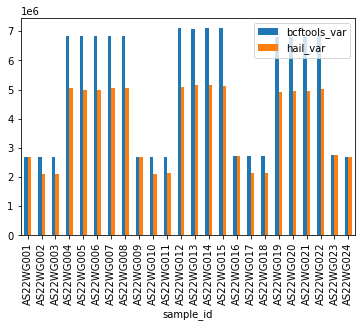

In [3]:
bcfs = pd.read_csv('../data/variant_number.csv').set_index('sample_id')
hail = pd.read_csv('../data/hail_number.tsv', sep='\t').set_index('sample_id')
vdf = pd.concat([bcfs.all_variants.rename('bcftools_var'),hail.all_variants.rename('hail_var')],axis=1).dropna()
vdf = vdf.iloc[[vdf.index.tolist().index(i) for i in order]]
vdf.plot.bar()
vdf['difference'] = (vdf.bcftools_var -  vdf.hail_var).abs()
vdf

The plot and the table below shows unfiltred  samples  (e.g 005-007) and parents of dsd samples shows big difference.
<br>
It is possible to conclude  there was a filter which was not applied on non-filter samples  and on parents of samples. <br>
Checking the genotype (GT) in samples with large difference, showed refrence GT were not excluded, as they should have. <br>
A modification in the code was preformed in order to fix it, and any future mistakes of this kind. <br>
After applying these changes, the result are similar

,bcftools_var,hail_var,difference
AS22WG001,2691561,2691562.0,1.0
AS22WG002,2115915,2115916.0,1.0
AS22WG003,2115050,2115050.0,0.0
AS22WG004,5053273,5053273.0,0.0
AS22WG005,4987121,4987121.0,0.0
AS22WG006,4974219,4974219.0,0.0
AS22WG007,5053549,5053549.0,0.0
AS22WG008,5061690,5061690.0,0.0
AS22WG009,2699664,2699664.0,0.0
AS22WG010,2116770,2116770.0,0.0


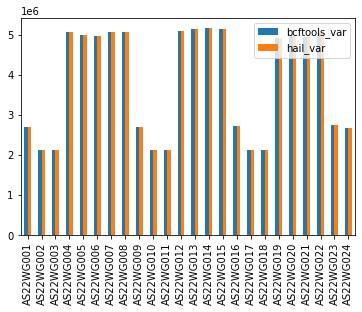

In [4]:
bcfs = pd.read_csv('../data/variant_number_fixed.csv').set_index('Unnamed: 0')

vdf = pd.concat([bcfs.all_variants.rename('bcftools_var'),hail.all_variants.rename('hail_var')],axis=1).dropna()
vdf = vdf.iloc[[vdf.index.tolist().index(i) for i in order]]
vdf.plot.bar()
vdf['difference'] = (vdf.bcftools_var -  vdf.hail_var).abs()
vdf

Doing other filterations, such as reading depth (DP) filteration or gnomAD's Allele frequency outputed the same results:<br>

In [10]:
bcfs = pd.read_csv('../data/variant_number_fixed.csv').set_index('Unnamed: 0')
hail = pd.read_csv('../data/hail_number.tsv', sep='\t').set_index('sample_id')
bcfs.columns = [i + '_bcf' for i in bcfs.columns]
hail.columns = [i + '_hail' for i in hail.columns]
comb = pd.concat([bcfs, hail], axis=1)
comb[comb.columns.sort_values()].dropna().drop(columns=['interval_variants_AF<0.01_DP>10_bcf','interval_variants_DP>10_bcf'])

,all_variants_bcf,all_variants_hail,interval_variants_AF<0.01_bcf,interval_variants_AF<0.01_hail,interval_variants_bcf,interval_variants_hail
AS22WG009,2699664,2699664.0,364,364.0,39517,39517.0
AS22WG010,2116770,2116770.0,260,260.0,36498,39516.0
AS22WG011,2122813,2122813.0,233,233.0,36302,39514.0
AS22WG023,2739889,2739889.0,161,161.0,36770,36770.0
AS22WG024,2676050,2676050.0,167,167.0,36837,36837.0
AS22WG004,5053273,5053273.0,152,152.0,34043,37510.0
AS22WG005,4987121,4987121.0,151,151.0,33925,37511.0
AS22WG006,4974219,4974219.0,160,160.0,33941,37510.0
AS22WG007,5053549,5053549.0,157,157.0,34027,37511.0
AS22WG008,5061690,5061690.0,144,144.0,34342,37510.0


Therefore, I am more than happy to annouce this problem as solved :)